In [110]:
import pandas as pd 
import numpy as np 
import sys
import os
sys.path.append("..")

from my_modules import my_functions as mybib


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
files_list = os.listdir('../data/input/road_accidents_germany')
files_list

['Unfallorte2018_LinRef.txt',
 'Unfallorte2019_LinRef.txt',
 'Unfallorte2020_LinRef.csv',
 'Unfallorte2021_LinRef.csv',
 'Unfallorte2022_LinRef.csv']

In [112]:

column_occurerences = {}
final_dataframes_list = []

for file in files_list:
    with open(f"../data/input/road_accidents_germany/{file}", 'r') as f:
        data = pd.read_csv(f,  encoding = 'ISO-8859-1', delimiter = ";")


            
        column_name_mapping = {
            'OBJECTID_1': 'OBJECTID',
            'USTRZUSTAND': 'STRZUSTAND',
            'IstSonstig' : 'IstSonstige',
            'IstStrassenzustand': 'STRZUSTAND',
            'XGCSWGS84' : 'Longitude',
            'YGCSWGS84' : 'Latitude'
            
        }
        
        missing_column = 'UIDENTSTLAE'
        
        column_order = ['OBJECTID', 'UIDENTSTLAE', 'ULAND', 'UREGBEZ', 'UKREIS', 'UGEMEINDE',
       'UJAHR', 'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART',
       'UTYP1', 'ULICHTVERH', 'STRZUSTAND', 'IstRad', 'IstPKW', 'IstFuss',
       'IstKrad', 'IstGkfz', 'IstSonstige', 'LINREFX', 'LINREFY', 'Longitude',
       'Latitude']

        data.rename(columns={col: column_name_mapping[col] for col in data.columns if col in column_name_mapping}, inplace=True)
        
      

        
        if missing_column not in data.columns:
            # Add the missing column with the default value
            data[missing_column] = None
            
        data = data[column_order]
        
        for column in data.columns:
            column_occurerences[column] = column_occurerences.get(column, 0) + 1  
        
        if data['UIDENTSTLAE'].dtype == 'float64':
        
            data['UIDENTSTLAE'] = data['UIDENTSTLAE'].apply(lambda x: f"{x:.0f}")
            data['UIDENTSTLAE'] = data['UIDENTSTLAE'].astype(str)
        data['Longitude'] = data['Longitude'].str.replace(',', '.').astype(float)
        data['Latitude'] = data['Latitude'].str.replace(',', '.').astype(float)


        # compare column names and dtypes before combine data set
        display(data.head(2))
        display(data.shape)        
        display(data.columns)
        display(data.dtypes)
        
        final_dataframes_list.append(data)      
        
for column, count in column_occurerences.items():
    print(f"{column}: {count}")
    
final_df = pd.concat(final_dataframes_list, ignore_index=True)
final_df.insert(0, 'NEW_OBJECTID', final_df.index) 


berlin_df = final_df[final_df['ULAND'] == 11]

,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,Longitude,Latitude
0,1,None,1,0,3,0,2018,1,8,5,...,1,0,0,0,0,0,"612054,341999999950000","5969634,006000000100000",10.703950,53.863081
1,2,None,1,0,62,20,2018,1,15,6,...,0,1,0,0,0,0,"592301,984999999990000","5938800,026999999800000",10.394497,53.589906


(211868, 25)

Index(['OBJECTID', 'UIDENTSTLAE', 'ULAND', 'UREGBEZ', 'UKREIS', 'UGEMEINDE',
       'UJAHR', 'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART',
       'UTYP1', 'ULICHTVERH', 'STRZUSTAND', 'IstRad', 'IstPKW', 'IstFuss',
       'IstKrad', 'IstGkfz', 'IstSonstige', 'LINREFX', 'LINREFY', 'Longitude',
       'Latitude'],
      dtype='object')

OBJECTID         int64
UIDENTSTLAE     object
ULAND            int64
UREGBEZ          int64
UKREIS           int64
UGEMEINDE        int64
UJAHR            int64
UMONAT           int64
USTUNDE          int64
UWOCHENTAG       int64
UKATEGORIE       int64
UART             int64
UTYP1            int64
ULICHTVERH       int64
STRZUSTAND       int64
IstRad           int64
IstPKW           int64
IstFuss          int64
IstKrad          int64
IstGkfz          int64
IstSonstige      int64
LINREFX         object
LINREFY         object
Longitude      float64
Latitude       float64
dtype: object

,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,Longitude,Latitude
0,1,None,1,0,57,25,2019,1,5,5,...,0,1,0,0,0,0,"579075,960927323440000","6023531,318255106000000",10.216714,54.35346
1,2,None,1,0,3,0,2019,1,6,2,...,1,1,0,0,0,0,"611914,920398440210000","5968419,523143058600000",10.701388,53.85220


(268370, 25)

Index(['OBJECTID', 'UIDENTSTLAE', 'ULAND', 'UREGBEZ', 'UKREIS', 'UGEMEINDE',
       'UJAHR', 'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART',
       'UTYP1', 'ULICHTVERH', 'STRZUSTAND', 'IstRad', 'IstPKW', 'IstFuss',
       'IstKrad', 'IstGkfz', 'IstSonstige', 'LINREFX', 'LINREFY', 'Longitude',
       'Latitude'],
      dtype='object')

OBJECTID         int64
UIDENTSTLAE     object
ULAND            int64
UREGBEZ          int64
UKREIS           int64
UGEMEINDE        int64
UJAHR            int64
UMONAT           int64
USTUNDE          int64
UWOCHENTAG       int64
UKATEGORIE       int64
UART             int64
UTYP1            int64
ULICHTVERH       int64
STRZUSTAND       int64
IstRad           int64
IstPKW           int64
IstFuss          int64
IstKrad          int64
IstGkfz          int64
IstSonstige      int64
LINREFX         object
LINREFY         object
Longitude      float64
Latitude       float64
dtype: object

,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,Longitude,Latitude
0,1,12200116471201851392,12,0,68,468,2020,1,11,5,...,0,0,0,0,1,0,"735840,436700000430000","5887204,801599999900000",12.521519,53.082133
1,2,12200106642131830784,12,0,61,112,2020,1,17,2,...,0,1,1,0,0,0,"814106,991899999790000","5811960,550300000200000",13.614609,52.367678


(237994, 25)

Index(['OBJECTID', 'UIDENTSTLAE', 'ULAND', 'UREGBEZ', 'UKREIS', 'UGEMEINDE',
       'UJAHR', 'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART',
       'UTYP1', 'ULICHTVERH', 'STRZUSTAND', 'IstRad', 'IstPKW', 'IstFuss',
       'IstKrad', 'IstGkfz', 'IstSonstige', 'LINREFX', 'LINREFY', 'Longitude',
       'Latitude'],
      dtype='object')

OBJECTID         int64
UIDENTSTLAE     object
ULAND            int64
UREGBEZ          int64
UKREIS           int64
UGEMEINDE        int64
UJAHR            int64
UMONAT           int64
USTUNDE          int64
UWOCHENTAG       int64
UKATEGORIE       int64
UART             int64
UTYP1            int64
ULICHTVERH       int64
STRZUSTAND       int64
IstRad           int64
IstPKW           int64
IstFuss          int64
IstKrad          int64
IstGkfz          int64
IstSonstige      int64
LINREFX         object
LINREFY         object
Longitude      float64
Latitude       float64
dtype: object

C:\Users\Domen\AppData\Local\Temp\ipykernel_5176\140561345.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f,  encoding = 'ISO-8859-1', delimiter = ";")


,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,Longitude,Latitude
0,1,1210308125013512021,1,0,54,165,2021,3,7,2,...,0,1,0,0,0,0,"483995,394383990205824","6069091,089339181780815",8.751233,54.768787
1,2,1210608134013112021,1,0,2,0,2021,6,15,3,...,0,1,0,0,0,0,"573010,098060709424317","6020090,876354970037937",10.122558,54.323450


(233208, 25)

Index(['OBJECTID', 'UIDENTSTLAE', 'ULAND', 'UREGBEZ', 'UKREIS', 'UGEMEINDE',
       'UJAHR', 'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART',
       'UTYP1', 'ULICHTVERH', 'STRZUSTAND', 'IstRad', 'IstPKW', 'IstFuss',
       'IstKrad', 'IstGkfz', 'IstSonstige', 'LINREFX', 'LINREFY', 'Longitude',
       'Latitude'],
      dtype='object')

OBJECTID         int64
UIDENTSTLAE     object
ULAND            int64
UREGBEZ          int64
UKREIS           int64
UGEMEINDE        int64
UJAHR            int64
UMONAT           int64
USTUNDE          int64
UWOCHENTAG       int64
UKATEGORIE       int64
UART             int64
UTYP1            int64
ULICHTVERH       int64
STRZUSTAND       int64
IstRad           int64
IstPKW           int64
IstFuss          int64
IstKrad          int64
IstGkfz          int64
IstSonstige      int64
LINREFX         object
LINREFY         object
Longitude      float64
Latitude       float64
dtype: object

C:\Users\Domen\AppData\Local\Temp\ipykernel_5176\140561345.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f,  encoding = 'ISO-8859-1', delimiter = ";")


,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,Longitude,Latitude
0,1,1220204125013262022,1,0,54,84,2022,2,19,6,...,1,1,0,0,0,0,"506085,644000001018867","6035085,351999809965491",9.093886,54.463396
1,2,1220529134013152022,1,0,57,44,2022,5,11,1,...,0,0,0,1,0,0,"593821,621226734016091","6014331,532445689663291",10.440636,54.268304


(256492, 25)

Index(['OBJECTID', 'UIDENTSTLAE', 'ULAND', 'UREGBEZ', 'UKREIS', 'UGEMEINDE',
       'UJAHR', 'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART',
       'UTYP1', 'ULICHTVERH', 'STRZUSTAND', 'IstRad', 'IstPKW', 'IstFuss',
       'IstKrad', 'IstGkfz', 'IstSonstige', 'LINREFX', 'LINREFY', 'Longitude',
       'Latitude'],
      dtype='object')

OBJECTID         int64
UIDENTSTLAE     object
ULAND            int64
UREGBEZ          int64
UKREIS           int64
UGEMEINDE        int64
UJAHR            int64
UMONAT           int64
USTUNDE          int64
UWOCHENTAG       int64
UKATEGORIE       int64
UART             int64
UTYP1            int64
ULICHTVERH       int64
STRZUSTAND       int64
IstRad           int64
IstPKW           int64
IstFuss          int64
IstKrad          int64
IstGkfz          int64
IstSonstige      int64
LINREFX         object
LINREFY         object
Longitude      float64
Latitude       float64
dtype: object

OBJECTID: 5
UIDENTSTLAE: 5
ULAND: 5
UREGBEZ: 5
UKREIS: 5
UGEMEINDE: 5
UJAHR: 5
UMONAT: 5
USTUNDE: 5
UWOCHENTAG: 5
UKATEGORIE: 5
UART: 5
UTYP1: 5
ULICHTVERH: 5
STRZUSTAND: 5
IstRad: 5
IstPKW: 5
IstFuss: 5
IstKrad: 5
IstGkfz: 5
IstSonstige: 5
LINREFX: 5
LINREFY: 5
Longitude: 5
Latitude: 5


In [113]:
berlin_df

,NEW_OBJECTID,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,Longitude,Latitude
112694,112694,112695,None,11,0,2,2,2018,1,15,...,0,1,1,0,0,0,"803604,156199999970000","5827580,737599999600000",13.475018,52.513597
112704,112704,112705,None,11,0,12,12,2018,1,11,...,0,1,0,0,0,0,"790639,585399999980000","5835009,589100000400000",13.291022,52.587259
112725,112725,112726,None,11,0,2,2,2018,1,9,...,0,1,1,0,0,0,"799827,961800000050000","5828733,522500000000000",13.420578,52.526019
112736,112736,112737,None,11,0,7,7,2018,1,17,...,0,1,1,0,0,0,"795223,508999999960000","5823525,401999999800000",13.348288,52.481844
112746,112746,112747,None,11,0,3,3,2018,1,15,...,1,0,1,0,0,0,"798261,384899999950000","5835047,259899999900000",13.403228,52.583472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192455,1192455,241016,11221202110000001380,11,0,1,1,2022,12,8,...,0,1,1,0,0,0,"798638,901755903032608","5828818,717901780270040",13.403180,52.527435
1192456,1192456,241017,11221222110000078260,11,0,3,3,2022,12,0,...,0,1,0,0,0,0,"798611,368158168043010","5833051,411938579753041",13.406581,52.565390
1192458,1192458,241019,11221215110000048470,11,0,1,1,2022,12,22,...,0,1,0,0,0,0,"795648,275617809966207","5829724,134001529775560",13.360030,52.537181
1192459,1192459,241020,11221230110000085660,11,0,7,7,2022,12,18,...,0,1,0,0,0,1,"798888,806377644999884","5820750,185129890218377",13.399615,52.454974


In [114]:
import geopandas as gpd
from shapely.geometry import Point

C:\Users\Domen\AppData\Local\Temp\ipykernel_5176\3407815189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  berlin_df['Point'] = berlin_df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)


EPSG:4326


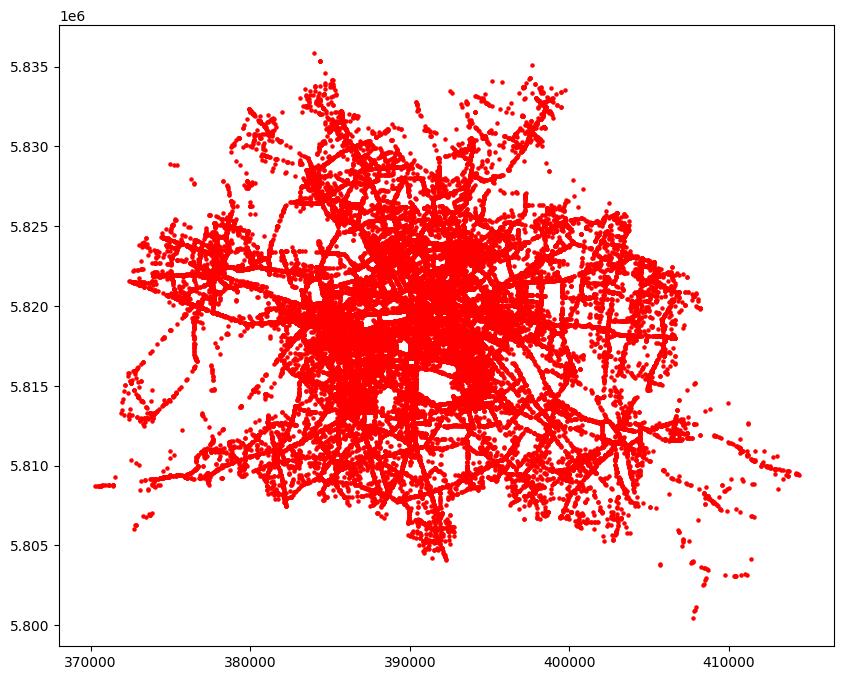

In [115]:
berlin_df['Point'] = berlin_df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
accident_gdf = gpd.GeoDataFrame(berlin_df, geometry='Point')
accident_gdf.set_crs(epsg=4326, inplace=True)
print(accident_gdf.crs)
accident_25833 = accident_gdf.to_crs('EPSG:25833')

fig, ax = plt.subplots(figsize=(10, 10))
accident_25833.plot(ax=ax, color='red', markersize=5)
plt.show()


In [116]:
accident_gdf

,NEW_OBJECTID,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,...,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,Longitude,Latitude,Point
112694,112694,112695,None,11,0,2,2,2018,1,15,...,1,1,0,0,0,"803604,156199999970000","5827580,737599999600000",13.475018,52.513597,POINT (13.47502 52.51360)
112704,112704,112705,None,11,0,12,12,2018,1,11,...,1,0,0,0,0,"790639,585399999980000","5835009,589100000400000",13.291022,52.587259,POINT (13.29102 52.58726)
112725,112725,112726,None,11,0,2,2,2018,1,9,...,1,1,0,0,0,"799827,961800000050000","5828733,522500000000000",13.420578,52.526019,POINT (13.42058 52.52602)
112736,112736,112737,None,11,0,7,7,2018,1,17,...,1,1,0,0,0,"795223,508999999960000","5823525,401999999800000",13.348288,52.481844,POINT (13.34829 52.48184)
112746,112746,112747,None,11,0,3,3,2018,1,15,...,0,1,0,0,0,"798261,384899999950000","5835047,259899999900000",13.403228,52.583472,POINT (13.40323 52.58347)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192455,1192455,241016,11221202110000001380,11,0,1,1,2022,12,8,...,1,1,0,0,0,"798638,901755903032608","5828818,717901780270040",13.403180,52.527435,POINT (13.40318 52.52743)
1192456,1192456,241017,11221222110000078260,11,0,3,3,2022,12,0,...,1,0,0,0,0,"798611,368158168043010","5833051,411938579753041",13.406581,52.565390,POINT (13.40658 52.56539)
1192458,1192458,241019,11221215110000048470,11,0,1,1,2022,12,22,...,1,0,0,0,0,"795648,275617809966207","5829724,134001529775560",13.360030,52.537181,POINT (13.36003 52.53718)
1192459,1192459,241020,11221230110000085660,11,0,7,7,2022,12,18,...,1,0,0,0,1,"798888,806377644999884","5820750,185129890218377",13.399615,52.454974,POINT (13.39962 52.45497)


EPSG:25833


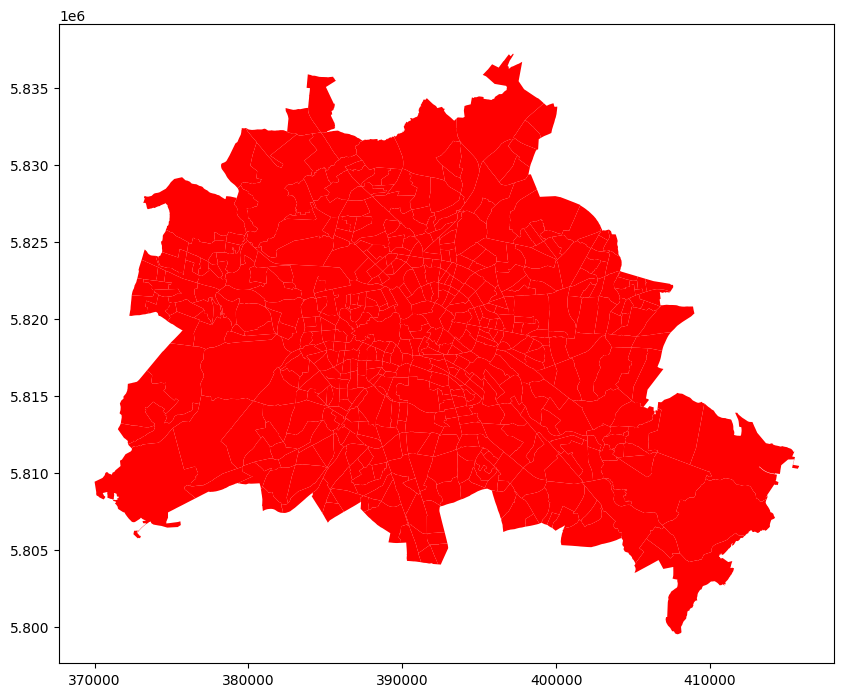

In [117]:
with open(f"../data/input/berlin/lor_planungsraeume_2021.geojson", 'r', encoding='utf-8') as f:
    LOR_gdf = gpd.read_file(f)
    

print(LOR_gdf.crs)
fig, ax = plt.subplots(figsize=(10, 10))
LOR_gdf.plot(ax=ax, color='red', markersize=5)
plt.show()

In [118]:
LOR_gdf

,PLR_ID,PLR_NAME,BEZ,STAND,GROESSE_M2,geometry
0,11501341,Karlshorst Süd,11,01.01.2021,2.294022e+06,"MULTIPOLYGON (((400826.929 5814871.126, 400825..."
1,07601340,Tirschenreuther Ring Ost,07,01.01.2021,4.139693e+05,"MULTIPOLYGON (((387795.701 5807587.153, 387789..."
2,02500831,Wismarplatz,02,01.01.2021,2.489883e+05,"MULTIPOLYGON (((396010.552 5819339.570, 396021..."
3,12601134,Märkisches Zentrum,12,01.01.2021,1.127856e+06,"MULTIPOLYGON (((387367.428 5828619.763, 387315..."
4,07601547,Horstwalder Straße,07,01.01.2021,9.414340e+05,"MULTIPOLYGON (((391807.174 5805331.900, 391808..."
...,...,...,...,...,...,...
537,12500927,Wittenau Nord,12,01.01.2021,2.494674e+06,"MULTIPOLYGON (((387367.428 5828619.763, 387300..."
538,03200204,Blankenfelde,03,01.01.2021,1.306786e+07,"MULTIPOLYGON (((391511.458 5829287.137, 391509..."
539,10400941,Pilgramer Straße,10,01.01.2021,3.690997e+06,"MULTIPOLYGON (((406855.615 5816612.734, 406846..."
540,08100101,Hasenheide,08,01.01.2021,8.663532e+05,"MULTIPOLYGON (((393020.232 5815761.570, 393020..."


In [119]:
print(accident_25833.crs)
print(LOR_gdf.crs)


print(accident_25833.is_valid.all())
print(LOR_gdf.is_valid.all())

EPSG:25833
EPSG:25833
True
True


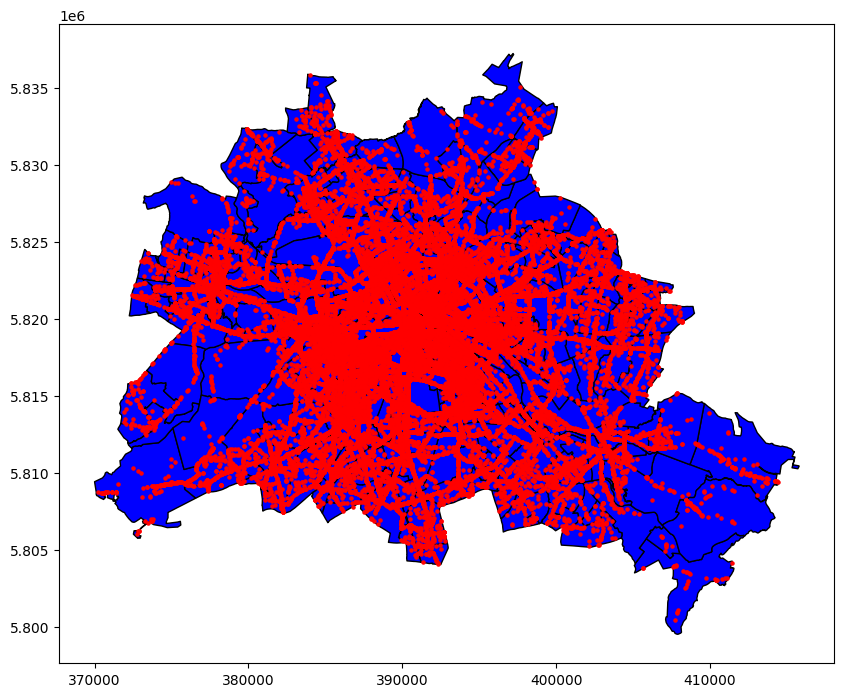

In [120]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
LOR_gdf.plot(ax=ax, color='blue', edgecolor='k')
accident_25833.plot(ax=ax, color='red', markersize=5)
plt.show()

In [121]:
berlin_lor = gpd.sjoin(accident_25833, LOR_gdf, how='left', op='intersects')

C:\Users\Domen\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [122]:
berlin_lor.head(2).T

,112694,112704
NEW_OBJECTID,112694,112704
OBJECTID,112695,112705
UIDENTSTLAE,None,None
ULAND,11,11
UREGBEZ,0,0
UKREIS,2,12
UGEMEINDE,2,12
UJAHR,2018,2018
UMONAT,1,1
USTUNDE,15,11


In [123]:
berlin_lor = berlin_lor.drop(columns=['index_right', 'PLR_NAME', 'BEZ', 'STAND', 'GROESSE_M2'])

In [124]:
with open(f"../data/input/berlin/Detailnetz-Strassenabschnitte.geojson", 'r', encoding='utf-8') as f:
    strassenabschnitte = gpd.read_file(f)

print(strassenabschnitte.crs)

strassen_25833 = strassenabschnitte.to_crs('EPSG:25833')

strassen_25833

EPSG:4326


,element_nr,strassensc,strassenna,str_bez,strassenkl,strassen_1,strassen_2,verkehrsri,bezirk,stadtteil,verkehrseb,beginnt_be,endet_bei_,laenge,gueltig_vo,okstra_id,geometry
0,34610003_34610004.01,00002,Aalemannufer,NaN,IV,G,STRA,B,Spandau,Hakenfelde,0,34610003,34610004,262.5000,2010-01-01,D62521E5E27544729878420C54E6C59C,"MULTILINESTRING ((379370.746 5826268.611, 3795..."
1,40540001_41540003.01,00005,Abbestraße,NaN,V,G,STRA,B,Charlottenburg-Wilmersdorf,Charlottenburg,0,40540001,41540003,182.4500,2010-01-01,275EE05309AF45DCA49E046BBA0CBBCC,"MULTILINESTRING ((385991.039 5819676.776, 3860..."
2,42590002_42590001.01,00022,Afrikanische Straße,NaN,II,G,STRA,B,Mitte,Wedding,0,42590002,42590001,65.3600,2010-01-01,18F55F73EB5346F6A7A719E970B9D4EC,"MULTILINESTRING ((387029.710 5824737.448, 3870..."
3,42590003_42590004.01,00022,Afrikanische Straße,NaN,II,G,STRA,B,Mitte,Wedding,0,42590003,42590004,61.4100,2010-01-01,AE661AB3DB344DD183550F05E15A4BD7,"MULTILINESTRING ((387078.894 5824336.242, 3870..."
4,42590005_42590006.01,00022,Afrikanische Straße,NaN,II,G,STRA,B,Mitte,Wedding,0,42590005,42590006,45.3600,2010-01-01,D47D9FE02F13481FA79966646BA478FA,"MULTILINESTRING ((387110.539 5824230.756, 3871..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43105,53530049_53530051.01,41423,Irenenstraße,NaN,V,G,STRA,B,Lichtenberg,Rummelsburg,0,53530049,53530051,192.8000,2021-03-04,BBA9B5EF7DB242898DDE1E53868D9227,"MULTILINESTRING ((398183.159 5818751.676, 3982..."
43106,53530051_53530040.01,42456,Rosenfelder Straße,NaN,V,G,STRA,B,Lichtenberg,Rummelsburg,0,53530051,53530040,123.1700,2021-03-04,92AD8579703C4E12B378108ED328B192,"MULTILINESTRING ((398367.785 5818696.292, 3983..."
43107,53530061_53530040.01,40696,Einbecker Straße,NaN,III,G,STRA,B,Lichtenberg,Rummelsburg,0,53530061,53530040,159.5962,2021-03-04,D8CB50FB08E34C0A8AA1A0095A40B0EF,"MULTILINESTRING ((398298.284 5818856.922, 3984..."
43108,53530057_53530061.01,40696,Einbecker Straße,NaN,III,G,STRA,B,Lichtenberg,Rummelsburg,0,53530057,53530061,52.6011,2021-03-04,2EB39A91A5AB43B3B612EC86DE4A3DD6,"MULTILINESTRING ((398252.357 5818882.558, 3982..."


In [125]:
# joined_gdf = gpd.sjoin(strassenflaechen, strassenabschnitte, how='left', op='contains')


In [126]:
# joined_gdf.head(10).T

In [127]:
# display(joined_gdf.shape)
# display(joined_gdf.isna().sum())

In [128]:
# accident_gdf.set_crs(strassenflaechen.crs, inplace=True)

In [129]:
# joined_data = gpd.sjoin(accident_gdf, strassenflaechen[['geometry', 'geometry']], how='left', op='within')

In [130]:
accident_gdf

,NEW_OBJECTID,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,...,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,Longitude,Latitude,Point
112694,112694,112695,None,11,0,2,2,2018,1,15,...,1,1,0,0,0,"803604,156199999970000","5827580,737599999600000",13.475018,52.513597,POINT (13.47502 52.51360)
112704,112704,112705,None,11,0,12,12,2018,1,11,...,1,0,0,0,0,"790639,585399999980000","5835009,589100000400000",13.291022,52.587259,POINT (13.29102 52.58726)
112725,112725,112726,None,11,0,2,2,2018,1,9,...,1,1,0,0,0,"799827,961800000050000","5828733,522500000000000",13.420578,52.526019,POINT (13.42058 52.52602)
112736,112736,112737,None,11,0,7,7,2018,1,17,...,1,1,0,0,0,"795223,508999999960000","5823525,401999999800000",13.348288,52.481844,POINT (13.34829 52.48184)
112746,112746,112747,None,11,0,3,3,2018,1,15,...,0,1,0,0,0,"798261,384899999950000","5835047,259899999900000",13.403228,52.583472,POINT (13.40323 52.58347)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192455,1192455,241016,11221202110000001380,11,0,1,1,2022,12,8,...,1,1,0,0,0,"798638,901755903032608","5828818,717901780270040",13.403180,52.527435,POINT (13.40318 52.52743)
1192456,1192456,241017,11221222110000078260,11,0,3,3,2022,12,0,...,1,0,0,0,0,"798611,368158168043010","5833051,411938579753041",13.406581,52.565390,POINT (13.40658 52.56539)
1192458,1192458,241019,11221215110000048470,11,0,1,1,2022,12,22,...,1,0,0,0,0,"795648,275617809966207","5829724,134001529775560",13.360030,52.537181,POINT (13.36003 52.53718)
1192459,1192459,241020,11221230110000085660,11,0,7,7,2022,12,18,...,1,0,0,0,1,"798888,806377644999884","5820750,185129890218377",13.399615,52.454974,POINT (13.39962 52.45497)


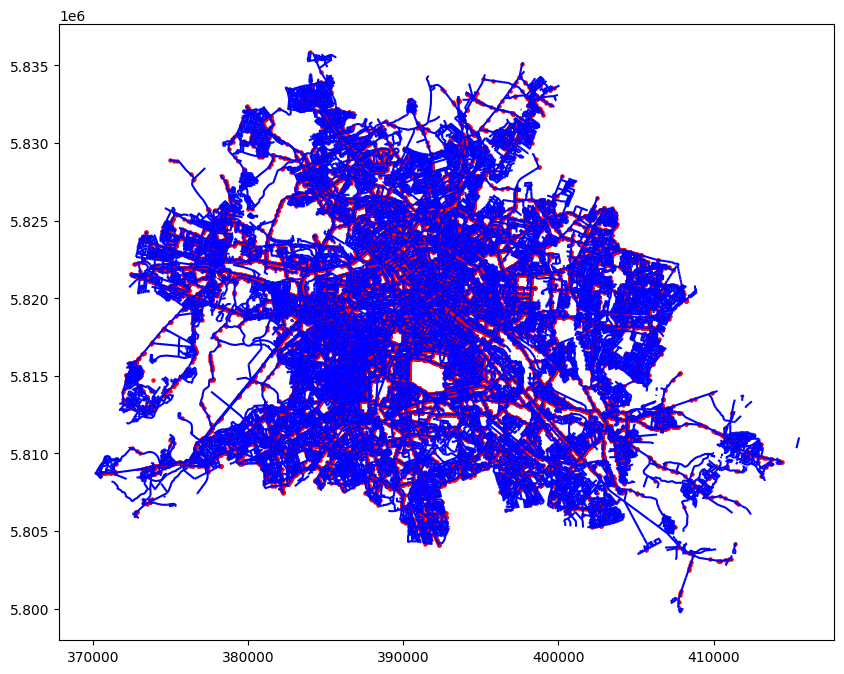

In [131]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
strassen_25833.plot(ax=ax, color='blue', edgecolor='k')
berlin_lor.plot(ax=ax, color='red', markersize=5)
plt.show()

In [132]:
nearest_line = gpd.sjoin_nearest(berlin_lor, strassen_25833, distance_col='distance')
nearest_line.T

,112694,113999,114112,114255,114268,114301,114403,114605,114792,114900,...,1192179,1192244,1192253,1192307,1192317,1192347,1192364,1192384,1192399,1192409
NEW_OBJECTID,112694,113999,114112,114255,114268,114301,114403,114605,114792,114900,...,1192179,1192244,1192253,1192307,1192317,1192347,1192364,1192384,1192399,1192409
OBJECTID,112695,114000,114113,114256,114269,114302,114404,114606,114793,114901,...,240740,240805,240814,240868,240878,240908,240925,240945,240960,240970
UIDENTSTLAE,None,None,None,None,None,None,None,None,None,None,...,11221231110000104910,11221225110000078290,11221207110000023070,11221211110000035550,11221230110000085240,11221216110000055010,11221211110000035690,11221204110000001840,11221205110000003490,11221221110000070490
ULAND,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
UREGBEZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
UKREIS,2,2,11,11,2,2,2,2,11,11,...,12,7,9,6,4,7,2,10,9,9
UGEMEINDE,2,2,11,11,2,2,2,2,11,11,...,12,7,9,6,4,7,2,10,9,9
UJAHR,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,...,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022
UMONAT,1,1,5,6,11,12,4,10,11,5,...,12,12,12,12,12,12,12,12,12,12
USTUNDE,15,9,11,17,17,13,10,18,14,7,...,19,16,14,17,13,21,19,13,12,1


In [133]:
final_df = nearest_line.drop(columns=['Point','index_right', 'element_nr', 'strassenna', 'str_bez', 'strassenkl', 'strassen_1',
       'strassen_2', 'verkehrsri', 'bezirk', 'stadtteil', 'verkehrseb',
       'beginnt_be', 'endet_bei_', 'laenge', 'gueltig_vo', 'okstra_id'])

In [135]:
final_df.to_csv('../data/tableau/berlin_accidents.csv', index = False)